In [23]:
from operator import itemgetter
import networkx as nx
import wikipedia
import matplotlib.pyplot as plt
import seaborn as sns
# import inspect


nx.__version__

'3.3'

In [4]:
SEED = "Abstract algebra".title()
STOPS = ("International Standard Serial Number",
         "International Standard Book Number",
         "National Diet Library",
         "International Standard Name Identifier",
         "International Standard Book Number (Identifier)",
         "Pubmed Identifier",
         "Pubmed Central",
         "Digital Object Identifier",
         "Arxiv",
         "Proc Natl Acad Sci Usa",
         "Bibcode",
         "Library Of Congress Control Number",
         "Jstor",
         "Doi (Identifier)",
         "Isbn (Identifier)",
         "Pmid (Identifier)",
         "Arxiv (Identifier)",
         "Bibcode (Identifier)")
IGNORE = ["abu",
          "mohammad",
          "muqit"
          ]


In [5]:
todo_lst = [(0, SEED)] # The SEED is in the layer 0
todo_set = set(SEED) # The SEED itself
done_set = set() # Nothing is done yet

In [6]:
g = nx.DiGraph()
layer, page = todo_lst[0]

In [7]:
%%time
while layer < 5:
  # Remove the name page of the current page from the todo_lst,
  # and add it to the set of processed pages.
  # If the script encounters this page again, it will skip over it.
  del todo_lst[0]
  done_set.add(page)

  # Show progress
  print(layer, page)

  # Attempt to download the selected page.
  try:
    wiki = wikipedia.page(page)
  except:
    print("Could not load", page)
    layer, page = todo_lst[0]
    continue

  for link in wiki.links:
    link = link.title()
    if link not in STOPS and not link.startswith("List Of"):
      if link not in todo_set and link not in done_set:
        todo_lst.append((layer + 1, link))
        todo_set.add(link)
      g.add_edge(page, link)
  layer, page = todo_lst[0]


print("{} nodes, {} edges".format(len(g), nx.number_of_edges(g)))


0 Abstract Algebra
1 Abelian Group
1 Abraham Fraenkel
1 Abstrakt Algebra
1 Addition
Could not load Addition
1 Affine Space
1 Al-Khwarizmi
1 Algebra
1 Algebra Over A Field
1 Algebraic Equation
1 Algebraic Equations
1 Algebraic Expression
1 Algebraic Function
1 Algebraic Function Field
1 Algebraic Geometry
1 Algebraic Integer
1 Algebraic Number Theory
1 Algebraic Structure
1 Algebraic Topology
1 Analytic Geometry
1 Analytic Number Theory
1 Andrew Wiles
Could not load Andrew Wiles
1 Applied Mathematics
1 Arithmetic
1 Arithmetic Geometry
1 Arithmetical Algebra
1 Arthur Cayley
1 Artin–Wedderburn Theorem
1 Ascending Chain Condition
1 Associative Algebra
1 Auguste Dick
1 Axiom
1 Axiomatic System
1 Bartel Van Der Waerden
1 Basis (Linear Algebra)
Could not load Basis (Linear Algebra)
1 Benjamin Peirce
1 Binary Operation
1 Binary Quadratic Form
1 Biquadratic Reciprocity
1 Biquaternion
1 Birkhäuser
1 Boolean Algebra
1 Boson
1 Calculus
1 Cancellation Property
1 Category (Mathematics)
1 Category Th

c:\Users\dadn\AppData\Local\Programs\Python\Python312\Lib\site-packages\wikipedia\wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file c:\Users\dadn\AppData\Local\Programs\Python\Python312\Lib\site-packages\wikipedia\wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Could not load Commutator
1 Complex Analysis
1 Complex Number
1 Composition Algebra
1 Computational Complexity Theory
1 Computational Mathematics
1 Computer Algebra
1 Computer Science
1 Control Theory
1 Coordinate Vector
1 Coquaternion
1 Cubic Reciprocity
1 Cyclic Group
1 Cyclotomic Field
1 David Hilbert
1 Dedekind Domain
1 Descending Chain Condition
1 Determinant
1 Differential Equation
1 Differential Geometry
1 Differential Topology
1 Diophantine Geometry
1 Direct Method In The Calculus Of Variations
1 Direct Sum Of Modules
1 Dirichlet'S Principle
1 Discrete Geometry
1 Discrete Mathematics
1 Discriminant
1 Distributive Law
Could not load Distributive Law
1 Dot Product
Could not load Dot Product
1 Edmund F. Robertson
1 Eigenvalues And Eigenvectors
1 Eisenstein Integer
Could not load Eisenstein Integer
1 Elementary Algebra
1 Emil Artin
1 Emmy Noether
Could not load Emmy Noether
1 Engineering Mathematics
1 Equation
1 Equivalence Relation
Could not load Equivalence Relation
1 Erlangen Pr

KeyboardInterrupt: 

In [8]:
print("{} nodes, {} edges".format(len(g), nx.number_of_edges(g)))

67120 nodes, 234728 edges


In [11]:

page = 'Abstract algebra'.title()
wiki = wikipedia.page(page)
len(wiki.links)

319

In [12]:
# make a copy of raw graph
original = g.copy()

# remove self loops
g.remove_edges_from(nx.selfloop_edges(g))

# identify duplicates like that: 'network' and 'networks'
duplicates = [(node, node + "s")
              for node in g if node + "s" in g
             ]

for dup in duplicates:
  # *dup is a technique named 'unpacking'
  g = nx.contracted_nodes(g, *dup, self_loops=False)

print(duplicates)

duplicates = [(x, y) for x, y in
              [(node, node.replace("-", " ")) for node in g]
                if x != y and y in g]
print(duplicates)

for dup in duplicates:
  g = nx.contracted_nodes(g, *dup, self_loops=False)

# nx.contracted creates a new node/edge attribute called contraction
# the value of the attribute is a dictionary, but GraphML
# does not support dictionary attributes
nx.set_node_attributes(g, 0,"contraction")
nx.set_edge_attributes(g, 0,"contraction")

print("{} nodes, {} edges".format(len(g), nx.number_of_edges(g)))

[('Quaternion', 'Quaternions'), ('Real Number', 'Real Numbers'), ('Semigroup', 'Semigroups'), ('Vector Space', 'Vector Spaces'), ('Alternating Group', 'Alternating Groups'), ('Cardinal Number', 'Cardinal Numbers'), ('Conway Group', 'Conway Groups'), ('Diffeomorphism', 'Diffeomorphisms'), ('Elliptic Curve', 'Elliptic Curves'), ('Finite Group', 'Finite Groups'), ('Fischer Group', 'Fischer Groups'), ('Group Homomorphism', 'Group Homomorphisms'), ('Hopf Algebra', 'Hopf Algebras'), ('Integer', 'Integers'), ('Integral Domain', 'Integral Domains'), ('Linear Combination', 'Linear Combinations'), ('Mathematician', 'Mathematicians'), ('Mathieu Group', 'Mathieu Groups'), ('Natural Number', 'Natural Numbers'), ('Near-Ring', 'Near-Rings'), ('Normal Subgroup', 'Normal Subgroups'), ('P-Adic Integer', 'P-Adic Integers'), ('Phillip Griffith', 'Phillip Griffiths'), ('Prime Number', 'Prime Numbers'), ('Quantum Group', 'Quantum Groups'), ('Rational Number', 'Rational Numbers'), ('Sporadic Group', 'Sporadi

In [13]:
degree = [drg for node , drg in g.degree()]
print(f'Max degree : {max(degree)}' )
print(f'Min degree : {min(degree)}' )

Max degree : 2332
Min degree : 1


<Axes: ylabel='Count'>

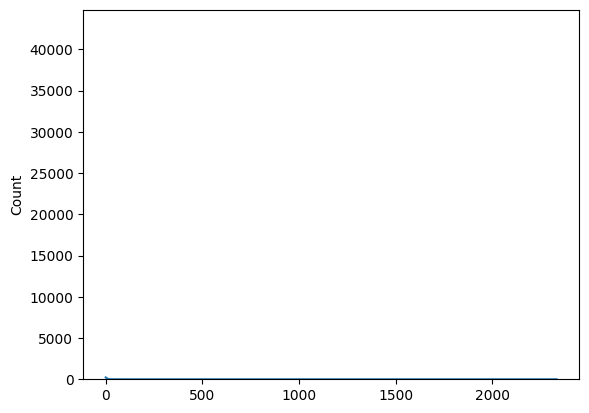

In [14]:
sns.histplot(data=degree, kde=True)

In [15]:
#filter nodes with degree greater than 2
#core decompo = 3
core = [node for node, drg in dict(g.degree()).items() if drg > 2 ]
degrees = [drg for node, drg in dict(g.degree()).items() if drg > 2 ]

In [16]:
subgraf_g = nx.subgraph(g,core)
print(f'Nodes: {len(subgraf_g)} edges: {nx.number_of_edges(subgraf_g)}')
nx.write_graphml(subgraf_g, "network_analysis.graphml")

Nodes: 15177 edges: 173687


In [17]:
print("Nodes removed: {:.2f}%".format(100*(1 - len(subgraf_g)/len(g))))
print("Edges removed: {:.2f}%".format(100*(1 - nx.number_of_edges(subgraf_g)/nx.number_of_edges(g))))
print("Original Average of edges by node: {:.2f}".format(nx.number_of_edges(g)/len(g)))
print("Subgraph Average of edges by node: {:.2f}".format(nx.number_of_edges(subgraf_g)/len(subgraf_g)))

Nodes removed: 77.12%
Edges removed: 25.56%
Original Average of edges by node: 3.52
Subgraph Average of edges by node: 11.44


In [18]:
import numpy as np
from collections import  Counter

In [19]:
Counter(degrees)

Counter({3: 4751,
         4: 2134,
         5: 1298,
         6: 1046,
         7: 846,
         9: 520,
         16: 468,
         8: 456,
         10: 325,
         11: 264,
         14: 238,
         12: 197,
         18: 157,
         13: 154,
         15: 124,
         17: 88,
         19: 75,
         20: 71,
         57: 69,
         22: 63,
         21: 51,
         23: 49,
         44: 43,
         24: 40,
         61: 36,
         27: 36,
         58: 35,
         34: 33,
         26: 33,
         25: 31,
         29: 30,
         31: 29,
         45: 24,
         59: 24,
         30: 23,
         36: 22,
         56: 22,
         55: 20,
         28: 20,
         32: 19,
         38: 19,
         60: 19,
         47: 18,
         49: 18,
         63: 17,
         39: 17,
         64: 16,
         33: 16,
         37: 15,
         35: 15,
         46: 15,
         62: 15,
         48: 15,
         65: 14,
         66: 11,
         52: 11,
         109: 9,
         51: 9,
   

In [20]:
top_indegree = sorted(dict(subgraf_g.in_degree()).items(),
                      reverse=True, key=itemgetter(1))[:100]

print("\n".join(map(lambda t: "{} {}".format(*reversed(t)), top_indegree)))

486 Mathematic
326 S2Cid (Identifier)
286 Mr (Identifier)
272 Issn (Identifier)
248 Jstor (Identifier)
247 Integer
245 Field (Mathematics)
243 Group Theory
240 Set (Mathematics)
236 Group (Mathematics)
228 Real Number
219 Vector Space
219 Abelian Group
202 Oclc (Identifier)
197 Category Theory
196 Image (Mathematics)
192 Linear Algebra
192 Complex Number
188 Algebraic Structure
182 Set Theory
181 Function (Mathematics)
178 Algebraic Geometry
176 Euclidean Geometry
175 Geometry
175 Ring (Mathematics)
175 Lie Group
174 European Mathematical Society
172 Wayback Machine
167 Abstract Algebra
165 Encyclopedia Of Mathematics
165 Mathematician
163 Subset
162 Bijection
158 Equivalence Relation
157 Isomorphism
154 Springer-Verlag
150 Algebra
149 Subgroup
148 Axiom
146 Mathematical Logic
145 Cambridge University Press
145 Topology
144 Cartesian Product
140 Intersection (Set Theory)
139 Rational Number
139 Matrix (Mathematics)
139 Empty Set
137 Number Theory
135 Category (Mathematics)
135 Natural 

<Axes: ylabel='Count'>

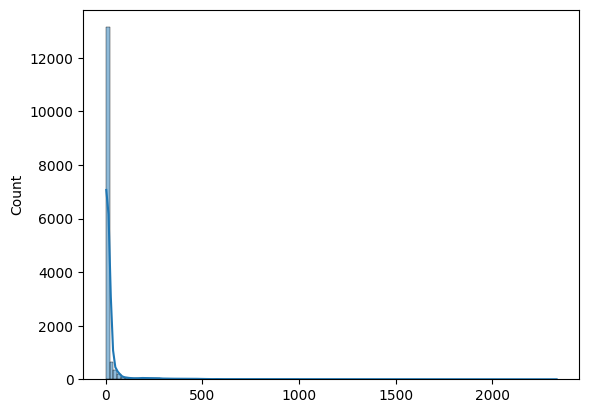

In [21]:
sns.histplot(data=degrees,kde = True,bins=np.histogram_bin_edges(degrees,50,range = (0,1000)))

# degree_centrality

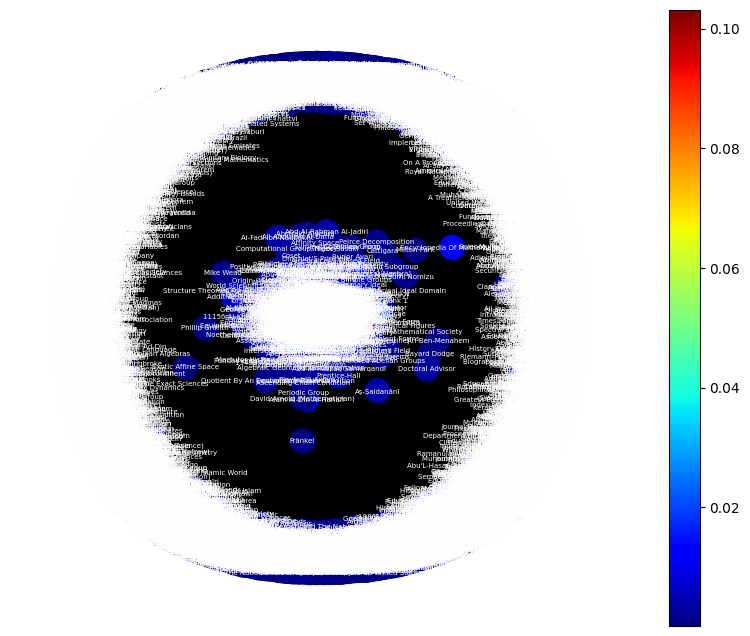

In [25]:
#the degree centrality of network(g)
fig, ax = plt.subplots(1,1,figsize=(10,8))

# layout position
pos = nx.spring_layout(subgraf_g,seed=8375,k=0.2)
# color of nodes
color = list(dict(nx.degree_centrality(subgraf_g)).values())

# draw edges
nx.draw_networkx_edges(subgraf_g,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(subgraf_g,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,
                 ax=ax)

# draw labels
nx.draw_networkx_labels(subgraf_g, pos=pos,
                        font_color='white',
                        font_size = 5,
                        ax=ax)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('degree_centrality.png', transparent=True,dpi=300)
plt.show()

# - Closeness Centrality

In [26]:
nx.closeness_centrality(g)

{'Abstract Algebra': 0.006685180721371519,
 'Abelian Group': 0.006147150450548834,
 'Abraham Fraenkel': 0.005770794300515233,
 'Abstrakt Algebra': 0.004606634063808173,
 'Addition': 0.006241078422187568,
 'Affine Space': 0.005989247081607292,
 'Al-Khwarizmi': 0.005612389896151427,
 'Algebra': 0.007149079760132642,
 'Algebra Over A Field': 0.005970412971287772,
 'Algebraic Equation': 0.005378445679517029,
 'Algebraic Expression': 0.005352452385858469,
 'Algebraic Function': 0.004871751933316195,
 'Algebraic Function Field': 0.005090057171231934,
 'Algebraic Geometry': 0.006759989457826338,
 'Algebraic Integer': 0.005189433531466841,
 'Algebraic Number Theory': 0.006524368813984576,
 'Algebraic Structure': 0.006585797459904152,
 'Algebraic Topology': 0.006476676059496384,
 'Analytic Geometry': 0.0064452663792854414,
 'Analytic Number Theory': 0.006411065737620154,
 'Andrew Wiles': 0.005935143205413667,
 'Applied Mathematics': 0.006563031740289669,
 'Arithmetic': 0.006715583261286801,
 'A

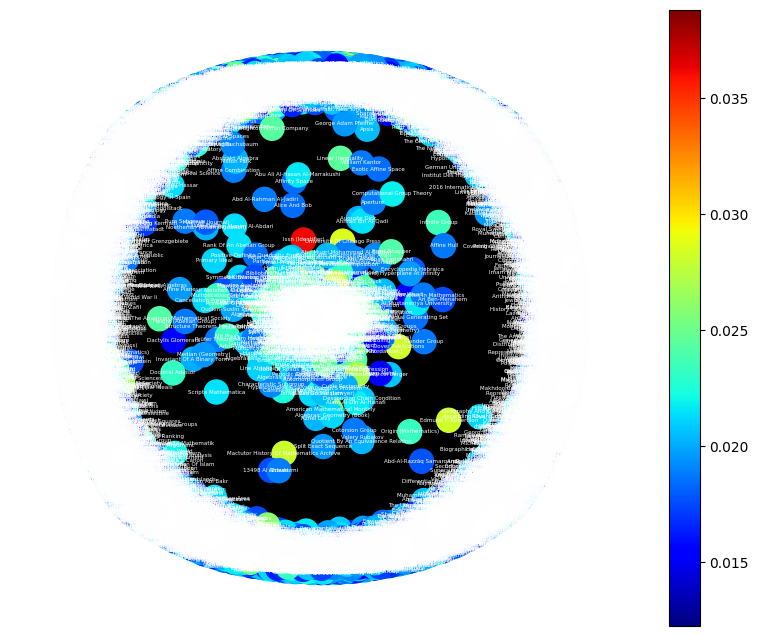

In [27]:

# the closeness centrality of network(g)
fig, ax = plt.subplots(1,1,figsize=(10,8))

# layout position
pos = nx.spring_layout(subgraf_g,seed=123456789,k=0.3)
# color of nodes
color = list(dict(nx.closeness_centrality(subgraf_g)).values())

# draw edges
nx.draw_networkx_edges(subgraf_g,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(subgraf_g,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,
                 ax=ax)

# draw labels
nx.draw_networkx_labels(subgraf_g, pos=pos,
                        font_color='white', ax=ax,font_size = 4)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('closeness_centrality.png', transparent=True,dpi=600)
plt.show()

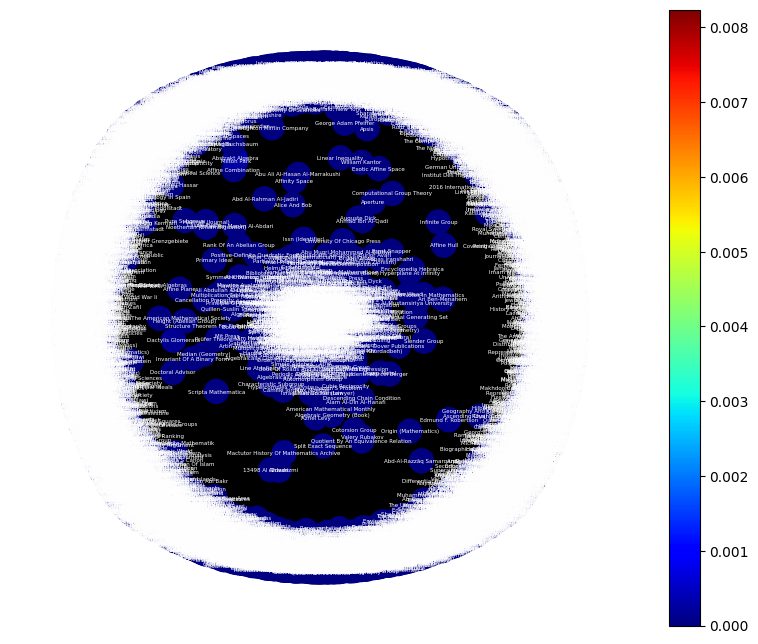

In [28]:
# the eigenvector centrality of network(g)
fig, ax = plt.subplots(1,1,figsize=(10,8))

# layout position
pos = nx.spring_layout(subgraf_g,seed=123456789,k=0.3)
# color of nodes
color = list(dict(nx.betweenness_centrality(subgraf_g)).values())

# draw edges
nx.draw_networkx_edges(subgraf_g,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(subgraf_g,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,
                 ax=ax)

# draw labels
nx.draw_networkx_labels(subgraf_g, pos=pos,
                        font_color='white', ax=ax,font_size = 4)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('betweenness_centrality.png', transparent=True,dpi=600)
plt.show()

In [1]:
# the eigenvector centrality of network(g)
fig, ax = plt.subplots(1,1,figsize=(10,8))

# layout position
pos = nx.spring_layout(g,seed=123456789,k=0.3)
# color of nodes
color = list(dict(nx.eigenvector_centrality(subgraf_g)).values())

# draw edges
nx.draw_networkx_edges(subgraf_g,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(subgraf_g,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,
                 ax=ax)

# draw labels
nx.draw_networkx_labels(subgraf_g, pos=pos,
                        font_color='white', ax=ax,font_size = 4)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('eigenvector_centrality.png', transparent=True,dpi=600)
plt.show()

NameError: name 'plt' is not defined

In [ ]:
import pandas as pd

: 

In [ ]:
bc = pd.Series(nx.betweenness_centrality(subgraf_g))
dc = pd.Series(nx.degree_centrality(subgraf_g))
ec = pd.Series(nx.eigenvector_centrality(subgraf_g))
cc = pd.Series(nx.closeness_centrality(subgraf_g))

df = pd.DataFrame.from_dict({"Betweenness": bc,
                            "Degree": dc,
                            "EigenVector": ec,
                            "Closeness": cc})
df.reset_index(inplace=True,drop=True)
df.head()

: 

In [ ]:
fig = sns.PairGrid(df)
fig.map_upper(sns.scatterplot)
fig.map_lower(sns.kdeplot, cmap="Reds_r")
fig.map_diag(sns.kdeplot, lw=2, legend=False)


plt.savefig('all.png', transparent=True,dpi=800,bbox_inches="tight")
plt.show()

: 

In [ ]:
# How many k-cores does this network have?
set([v for k,v in nx.core_number(subgraf_g).items()])

: 

In [ ]:
import matplotlib.patches as mpatches

: 

In [ ]:
# the degree of network(g2)
fig, ax = plt.subplots(1,1,figsize=(10,8))

# Find k-cores
g2_core_9 = nx.k_shell(subgraf_g, 9)
g2_core_10 = nx.k_core(subgraf_g, 10)

# layout position
pos = nx.spring_layout(subgraf_g,seed=123456789,k=0.3)

# draw edges
nx.draw_networkx_edges(subgraf_g,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(subgraf_g,
                 pos=pos,
                 node_color="#333333")

# draw nodes
nodes = nx.draw_networkx_nodes(g2_core_9,
                 pos=pos,
                 node_color="blue")

nodes = nx.draw_networkx_nodes(g2_core_10,
                 pos=pos,
                 node_color="red")

# static legend
red_patch = mpatches.Patch(color='red', label='10-core')
blue_patch = mpatches.Patch(color='blue', label='9-shell')
plt.legend(handles=[red_patch,blue_patch])

plt.axis("off")
plt.savefig('k-core_sociopatterns.png', transparent=True,dpi=600)
plt.show()

: 

In [ ]:
plt.style.use("default")
# degree sequence
degree_sequence = sorted([d for n, d in subgraf_g.degree()], reverse=True)

fig, ax = plt.subplots(1,2,figsize=(8,6))

# all_data has information about degree_sequence and the width of each bin
all_data = ax[0].hist(degree_sequence,bins=7)
ax[1].hist(degree_sequence,bins=7,density=True)

ax[0].set_title("Degree Histogram")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Degree")

ax[1].set_title("Probability Density Function")
ax[1].set_ylabel("Probability")
ax[1].set_xlabel("Degree")

plt.tight_layout()
plt.show()

: 

In [ ]:
plt.style.use("fivethirtyeight")
#plt.style.use("default")

fig, ax = plt.subplots(1,1,figsize=(10,8))

sns.histplot(degree_sequence,bins=7,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="Probability Density Function (PDF)",ax=ax2)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Degree")
ax2.set_ylabel("Probability")

plt.savefig('probability_density_function.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

: 

In [ ]:
plt.style.use("ggplot")

# Another way to visualize the cumulative distribution
def ecdf(data):
    return np.sort(data), np.arange(1, len(data) + 1) / len(data)

def ecdf_degree(G):
    """ECDF of degree."""
    num_neighbors = [len(list(G.neighbors(n))) for n in G.nodes()]
    x, y = ecdf(num_neighbors)
    plt.scatter(x, y)
    plt.xlabel("degree")
    plt.ylabel("cumulative fraction")


#
# insighs
# cdf(1) - almore 40% of vertices has degree 1
# cdf(2) P(degree <= 2) - 50% of vertices has at least degree 2 or less
# cdf(6) P(degree <= 6) - more than 95% of vertices has at least degree 6 or less
ecdf_degree(subgraf_g)

: 